![TS banner](banner.png)

# A Quicklook JWST NIRSpec/G395H transit of HAT-P-14b via `transitspectroscopy`
**Author**: Néstor Espinoza (Assistant Astronomer; Mission Scientist for Exoplanet Science)
**Last updated**: June 4th, 2024

## Motivation & Data Description

In this notebook, we aim to obtain a JWST NIRSpec/G395H white light lightcurve of [the exoplanet HAT-P-14~b (PID 1118; PI Proffitt)](https://www.stsci.edu/jwst/science-execution/program-information?id=1118) using `transitspectroscopy`. This dataset was obtained during JWST commissioning observations in order to study the spectrophotometric capabilities of the instrument. An initial analysis was shown in [Espinoza et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023PASP..135a8002E/abstract) --- here, we aim to reproduce a sort of "step by step" on how to reproduce (and improve upon!) those results --- by first obtaining its "white-light" lightcurve.

As the documentation states, `transitspectroscopy` makes use of Stage 1 of the JWST Calibration Pipeline for most of its detector-level calibration. Because of this we list below the versions of the JWST pipeline and `transitspectroscopy` we will be using:

In [1]:
import jwst
import transitspectroscopy as ts

In [2]:
from jwst import datamodels

In [3]:
print('JWST Calibration pipeline version:', jwst.__version__)
print('transitspectroscopy version:', ts.__version__)

JWST Calibration pipeline version: 1.14.0
transitspectroscopy version: 0.4.0


In [4]:
import glob

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

Below, we use the `transitspectroscopy` library to download, calibrate and perform tracing and extraction of NIRSpec/G395H data for HAT-P-14 b.

## 1. Data download and setup

First, let's use the `transitspectroscopy` library to download the data for HAT-P-14b (https://www.stsci.edu/jwst/science-execution/program-information?id=1118):

In [5]:
ts.jwst.download(pid = 1118, obs_num = '5')


	 >> 5.97 GB of data will be downloaded in total considering the following files:

 obsID   obs_collection dataproduct_type ... calib_level   filters   
-------- -------------- ---------------- ... ----------- ------------
83341588           JWST            image ...           1 F290LP;G395H
83341589           JWST            image ...           1 F110W;MIRROR
83341590           JWST            image ...           1 F290LP;G395H
83341591           JWST            image ...           1 F290LP;G395H
83341592           JWST            image ...           1 F290LP;G395H
83341593           JWST            image ...           1 F290LP;G395H
83341594           JWST            image ...           1 F110W;MIRROR
83341595           JWST            image ...           1 F290LP;G395H

	 >> Downloading...


	 >> ...done! Downloaded and stored the following files on the JWSTdata folder:

                                           Filename        Description  \
0  jw01118005001_02101_00001-seg001_nr

Load datasets. First, via `glob` to get filelist:

In [6]:
nrs1_filenames = glob.glob('JWSTdata/jw01118005001_04101*nrs1_uncal.fits')
nrs2_filenames = glob.glob('JWSTdata/jw01118005001_04101*nrs2_uncal.fits')

Then load them into `transitspectroscopy`:

In [7]:
nrs1_dataset = ts.jwst.load(nrs1_filenames, outputfolder = 'JWSTdata')
nrs2_dataset = ts.jwst.load(nrs2_filenames, outputfolder = 'JWSTdata')

	    - Instrument/Mode: NIRSpec/G395H

	    - Instrument/Mode: NIRSpec/G395H



## 2. Detector calibration and ramp fitting

Let's perform detector calibration on both detectors. `transitspectroscopy` follows mostly the JWST Calibration pipeline except in the jump step --- there we do our own "TSO" jump-detection. First NRS1:

In [8]:
nrs1_dataset.detector_calibration()

	 [START] Detector-level Calibration


	 >> Processing 3 files.

	    - TSO total duration: 6.0 hours
	    - Calibration parameters:
{'dq_init': {}, 'saturation': {}, 'refpix': {}, 'linearity': {'output_dir': 'JWSTdata/ts_outputs', 'save_results': True, 'suffix': 'linearitystep'}, 'dark_sub': {}, 'jump': {'window': 10, 'nsigma': 10}, 'ramp_fit': {'output_dir': 'JWSTdata/ts_outputs', 'save_results': True, 'suffix': 'ramp_fitstep'}, 'tracing': {'row_window': 1, 'column_window': 7}, 'superbias': {}, 'group_1f': {}, 'skip': {}}


2024-05-02 01:10:33,043 - stpipe.DQInitStep - INFO - DQInitStep instance created.
2024-05-02 01:10:33,305 - stpipe.DQInitStep - INFO - Step DQInitStep running with args (<RampModel(561, 20, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_uncal.fits>,).
2024-05-02 01:10:33,307 - stpipe.DQInitStep - INFO - Step DQInitStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
2024-05-02 01:10:33,338 - stpipe.DQInitStep - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0051.fits
2024-05-02 01:10:36,445 - stpipe.DQInitStep - INFO - Extracting mask subarray to match science data
2024-05-02 01:10:38,014 - stpipe.DQInitStep - INFO - Results used CRDS context: jwst_1228.pmap
2024-05-02 01:10:38,015 - stpipe.DQInitStep - INFO - Step DQInitStep done
2024-05-02 0

	 >> Performing TSO-jump...

	 >> ...done! Saving...

	 [END] Detector-level Calibration




Now NRS2:

In [9]:
nrs2_dataset.detector_calibration()

2024-05-02 01:24:29,376 - stpipe.DQInitStep - INFO - DQInitStep instance created.


	 [START] Detector-level Calibration


	 >> Processing 3 files.

	    - TSO total duration: 6.0 hours
	    - Calibration parameters:
{'dq_init': {}, 'saturation': {}, 'refpix': {}, 'linearity': {'output_dir': 'JWSTdata/ts_outputs', 'save_results': True, 'suffix': 'linearitystep'}, 'dark_sub': {}, 'jump': {'window': 10, 'nsigma': 10}, 'ramp_fit': {'output_dir': 'JWSTdata/ts_outputs', 'save_results': True, 'suffix': 'ramp_fitstep'}, 'tracing': {'row_window': 1, 'column_window': 7}, 'superbias': {}, 'group_1f': {}, 'skip': {}}


2024-05-02 01:24:29,614 - stpipe.DQInitStep - INFO - Step DQInitStep running with args (<RampModel(561, 20, 32, 2048) from jw01118005001_04101_00001-seg001_nrs2_uncal.fits>,).
2024-05-02 01:24:29,617 - stpipe.DQInitStep - INFO - Step DQInitStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
2024-05-02 01:24:29,641 - stpipe.DQInitStep - INFO - Using MASK reference file /grp/crds/cache/references/jwst/jwst_nirspec_mask_0049.fits
2024-05-02 01:24:32,492 - stpipe.DQInitStep - INFO - Extracting mask subarray to match science data
2024-05-02 01:24:33,995 - stpipe.DQInitStep - INFO - Results used CRDS context: jwst_1228.pmap
2024-05-02 01:24:33,998 - stpipe.DQInitStep - INFO - Step DQInitStep done
2024-05-02 01:24:34,033 - stpipe.DQInitStep - INFO - DQInitStep instance created.
2024-05-02 0

	 >> Performing TSO-jump...

	 >> ...done! Saving...

	 [END] Detector-level Calibration




Fit ramps:

In [12]:
nrs1_dataset.fit_ramps()
nrs2_dataset.fit_ramps()

2024-05-02 07:29:19,302 - stpipe.RampFitStep - INFO - RampFitStep instance created.
2024-05-02 07:29:19,467 - stpipe.RampFitStep - INFO - Step RampFitStep running with args (<RampModel(561, 20, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_tsojumpstep.fits>,).
2024-05-02 07:29:19,469 - stpipe.RampFitStep - INFO - Step RampFitStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: JWSTdata/ts_outputs
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: ramp_fitstep
  search_output_file: True
  input_dir: ''
  int_name: ''
  save_opt: False
  opt_name: ''
  suppress_one_group: True
  maximum_cores: '1'


	 >> Performing Rampfit step...



2024-05-02 07:29:19,542 - stpipe.RampFitStep - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0043.fits
2024-05-02 07:29:19,543 - stpipe.RampFitStep - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0025.fits
2024-05-02 07:29:19,608 - stpipe.RampFitStep - INFO - Extracting gain subarray to match science data
2024-05-02 07:29:19,609 - stpipe.RampFitStep - INFO - Extracting readnoise subarray to match science data
2024-05-02 07:29:19,610 - stpipe.RampFitStep - INFO - Using algorithm = ols
2024-05-02 07:29:19,611 - stpipe.RampFitStep - INFO - Using weighting = optimal
2024-05-02 07:51:01,692 - stpipe.RampFitStep - INFO - Number of groups per integration: 20
2024-05-02 07:51:01,695 - stpipe.RampFitStep - INFO - Number of integrations: 561
2024-05-02 07:51:06,959 - stpipe.RampFitStep - INFO - Results used CRDS context: jwst_1228.pmap
2024-05-02 07:51:06,961 - stpipe.RampFitStep - INFO - Results used CRDS cont

	 >> Performing Rampfit step...



2024-05-02 08:10:48,250 - stpipe.RampFitStep - INFO - Using READNOISE reference file: /grp/crds/cache/references/jwst/jwst_nirspec_readnoise_0048.fits
2024-05-02 08:10:48,251 - stpipe.RampFitStep - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_nirspec_gain_0027.fits
2024-05-02 08:10:48,341 - stpipe.RampFitStep - INFO - Extracting gain subarray to match science data
2024-05-02 08:10:48,343 - stpipe.RampFitStep - INFO - Extracting readnoise subarray to match science data
2024-05-02 08:10:48,344 - stpipe.RampFitStep - INFO - Using algorithm = ols
2024-05-02 08:10:48,345 - stpipe.RampFitStep - INFO - Using weighting = optimal
2024-05-02 08:31:11,836 - stpipe.RampFitStep - INFO - Number of groups per integration: 20
2024-05-02 08:31:11,839 - stpipe.RampFitStep - INFO - Number of integrations: 561
2024-05-02 08:31:16,542 - stpipe.RampFitStep - INFO - Results used CRDS context: jwst_1228.pmap
2024-05-02 08:31:16,545 - stpipe.RampFitStep - INFO - Results used CRDS cont

## 3. Tracing and spectral extraction

Let's trace and get spectral extraction. It can be done for any aperture (see below), but we do it for a single aperture for now. 

First, we setup a dictionary with the outputs from the ramp-fitting for NRS1 and NRS2 (I'm working on incorporating this to the nice object-oriented setup I had above, but for now, I have a handy function that handles both tracing and extraction):

In [18]:
input_dictionary_nrs1 = {}
input_dictionary_nrs2 = {}

nsegments = len(nrs1_dataset.rateints_per_segment)

input_dictionary_nrs1['rampstep'] = nrs1_dataset.rateints_per_segment
input_dictionary_nrs1['times'] = nrs1_dataset.times

input_dictionary_nrs2['rampstep'] = nrs2_dataset.rateints_per_segment
input_dictionary_nrs2['times'] = nrs2_dataset.times

input_dictionary_nrs1['ints_per_segment'] = []
input_dictionary_nrs2['ints_per_segment'] = []

for i in range(nsegments):

    input_dictionary_nrs1['ints_per_segment'].append( nrs1_dataset.rateints_per_segment[i].data.shape[0] )
    input_dictionary_nrs2['ints_per_segment'].append( nrs2_dataset.rateints_per_segment[i].data.shape[0] )
    

And now we run tracing and simple extraction for a 2-pixel aperture. Note is done twice --- one for NRS1, one for NRS2. It also is all parallelized; you set the number of threads, the `ray` library internally via `transitspectroscopy` does the rest:

In [19]:
all_outputs_nrs1 = {}
all_outputs_nrs2 = {}

aperture = 2 # pixels

all_outputs_nrs1[aperture] = ts.jwst.stage2(input_dictionary_nrs1, 
                                            nthreads = 10, 
                                            outputfolder = '/ifs/jwst/wit/nirspec/nespinoza/', 
                                            suffix = str(aperture)+'pix', 
                                            aperture_radius = aperture)

all_outputs_nrs2[aperture] = ts.jwst.stage2(input_dictionary_nrs2, 
                                            nthreads = 10, 
                                            outputfolder = '/ifs/jwst/wit/nirspec/nespinoza/', 
                                            suffix = str(aperture)+'pix', 
                                            aperture_radius = aperture)

	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS1/SUB2048



2024-05-02 09:12:33,143 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 09:12:40,725 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-12-40_496797_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 09:12:40,730 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-12-40_496797_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 09:12:41,951 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-12-40_496797_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 09:12:41,955 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-12-40_496797_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 09:12:44,619 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-12-40_496797_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 09:1

	 >> Tracing will be done via the ray library:
	    - It should take about 0.07 hours to trace all 1139 integrations.
(pid=239266) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.08 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1334.65it/s]
2024-05-02 09:17:27,185 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_2pix_nrs1.pkl'>



	    - Done! Took 0.88 seconds. Saving...


2024-05-02 09:17:27,598 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:06<00:00, 175.97it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:21<00:00, 14.04it/s]
2024-05-02 09:18:56,005 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


	    - Done! Extracting wavelength map...


2024-05-02 09:18:56,221 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_tsojumpstep_1_ramp_fitstep.fits>,).
2024-05-02 09:18:56,224 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 09:18:56,457 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 09:18:56,458 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 09:18:56,459 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 09:

	    - Done! Took 90.63 seconds. Saving...
(pid=239270) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS2/SUB2048



2024-05-02 09:19:00,439 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 09:19:08,715 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-19-08_597005_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 09:19:08,721 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-19-08_597005_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 09:19:09,878 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-19-08_597005_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 09:19:09,881 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-19-08_597005_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 09:19:11,409 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-19-08_597005_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 09:1

	 >> Tracing will be done via the ray library:
	    - It should take about 0.09 hours to trace all 1139 integrations.
(pid=245429) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.10 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1173.37it/s]
2024-05-02 09:25:16,267 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_2pix_nrs2.pkl'>



	    - Done! Took 0.98 seconds. Saving...


2024-05-02 09:25:16,749 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:07<00:00, 160.72it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:44<00:00, 10.86it/s]
2024-05-02 09:27:09,544 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2024-05-02 09:27:09,784 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs2_tsojumpstep_1_ramp_fitstep.fits>,).


	    - Done! Extracting wavelength map...


2024-05-02 09:27:09,788 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 09:27:10,059 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 09:27:10,060 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 09:27:10,061 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 09:27:10,063 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.00016770793767766654 deg
2024-05-02 09:27:10,373 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS2: ['S1600A1']
2024-05-

	    - Done! Took 114.94 seconds. Saving...


2024-05-02 09:27:11,954 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/spectra_2pix_nrs2.pkl'>



(pid=245436) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]


Let's plot the white-light lightcurve results for one aperture:

2024-05-02 11:14:12,225 - stpipe - WARNING - invalid escape sequence '\s'

2024-05-02 11:14:12,229 - stpipe - WARNING - invalid escape sequence '\s'

2024-05-02 11:14:12,232 - stpipe - WARNING - invalid escape sequence '\s'



(0.992, 1.0025)

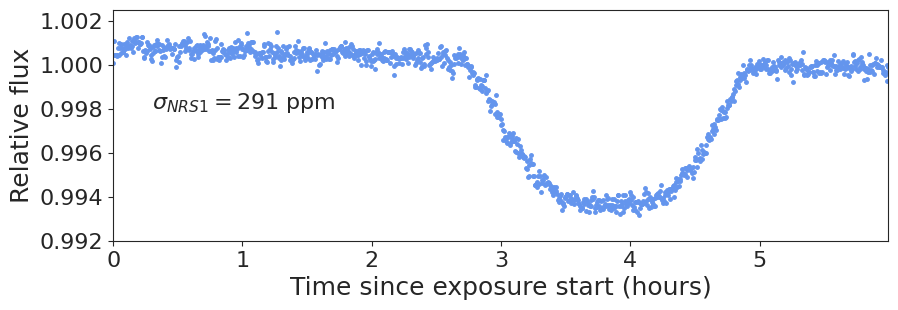

In [37]:
plt.figure(figsize=(10,3))

tsincestart_nrs1 = (input_dictionary_nrs1['times'] - input_dictionary_nrs1['times'][0])*24
plt.plot(tsincestart_nrs1, all_outputs_nrs1[aperture]['whitelight'], '.', color = 'cornflowerblue')
rms_nrs1 = np.sqrt(np.var(all_outputs_nrs1[aperture]['whitelight'][0:100]))*1e6
plt.text(0.3, 0.998, '$\sigma_{NRS1} = $'+'{0:.0f} ppm'.format(rms_nrs1), fontsize = 16)

plt.xlabel('Time since exposure start (hours)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.xlim(np.min(tsincestart_nrs1), np.max(tsincestart_nrs1))
plt.ylim(0.992, 1.0025)

2024-05-02 11:14:17,172 - stpipe - WARNING - invalid escape sequence '\s'

2024-05-02 11:14:17,176 - stpipe - WARNING - invalid escape sequence '\s'

2024-05-02 11:14:17,179 - stpipe - WARNING - invalid escape sequence '\s'



(0.992, 1.0025)

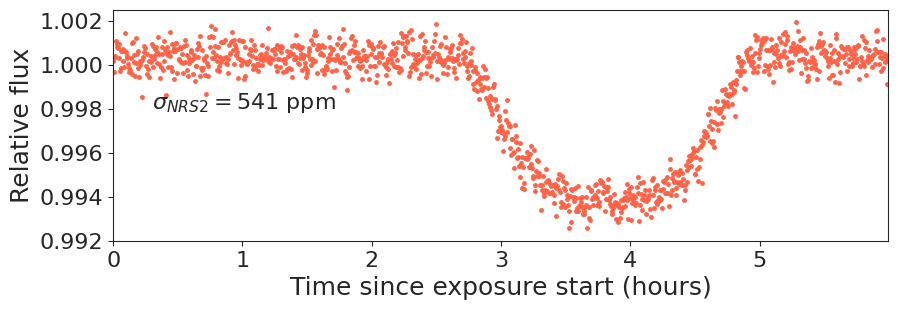

In [38]:
plt.figure(figsize=(10,3))

tsincestart_nrs2 = (input_dictionary_nrs2['times'] - input_dictionary_nrs2['times'][0])*24
plt.plot(tsincestart_nrs2, all_outputs_nrs2[aperture]['whitelight'], '.', color = 'tomato')
rms_nrs2 = np.sqrt(np.var(all_outputs_nrs2[aperture]['whitelight'][0:100]))*1e6
plt.text(0.3, 0.998, '$\sigma_{NRS2} = $'+'{0:.0f} ppm'.format(rms_nrs2), fontsize = 16)

plt.xlabel('Time since exposure start (hours)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.xlim(np.min(tsincestart_nrs2), np.max(tsincestart_nrs2))
plt.ylim(0.992, 1.0025)

We can also run the code below to run the results for various other apertures, to check which one is optimal:

In [ ]:
for aperture in [4, 6, 8, 10, 12]:

    all_outputs_nrs1[aperture] = ts.jwst.stage2(input_dictionary_nrs1, 
                                 nthreads = 10, 
                                 outputfolder = '/ifs/jwst/wit/nirspec/nespinoza/', 
                                 suffix = str(aperture)+'pix', 
                                 aperture_radius = aperture)

    all_outputs_nrs2[aperture] = ts.jwst.stage2(input_dictionary_nrs2, 
                                 nthreads = 10, 
                                 outputfolder = '/ifs/jwst/wit/nirspec/nespinoza/', 
                                 suffix = str(aperture)+'pix', 
                                 aperture_radius = aperture)

	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS1/SUB2048



2024-05-02 09:40:48,035 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 09:40:55,437 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-40-55_312965_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 09:40:55,442 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-40-55_312965_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 09:40:56,597 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-40-55_312965_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 09:40:56,600 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-40-55_312965_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 09:40:58,130 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-40-55_312965_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 09:4

	 >> Tracing will be done via the ray library:
	    - It should take about 0.07 hours to trace all 1139 integrations.
(pid=261616) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.08 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1354.98it/s]
2024-05-02 09:45:35,560 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_4pix_nrs1.pkl'>



	    - Done! Took 0.85 seconds. Saving...


2024-05-02 09:45:35,896 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:06<00:00, 183.69it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:20<00:00, 14.22it/s]
2024-05-02 09:47:02,971 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2024-05-02 09:47:03,230 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_tsojumpstep_1_ramp_fitstep.fits>,).


	    - Done! Extracting wavelength map...


2024-05-02 09:47:03,233 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 09:47:03,428 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 09:47:03,429 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 09:47:03,430 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 09:47:03,431 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.00016770793767766654 deg
2024-05-02 09:47:03,772 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: ['S1600A1']
2024-05-

	    - Done! Took 89.20 seconds. Saving...
(pid=261614) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS2/SUB2048



2024-05-02 09:47:07,235 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 09:47:15,323 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-47-15_189436_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 09:47:15,326 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-47-15_189436_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 09:47:16,498 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-47-15_189436_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 09:47:16,501 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-47-15_189436_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 09:47:18,048 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-47-15_189436_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 09:4

	 >> Tracing will be done via the ray library:
	    - It should take about 0.09 hours to trace all 1139 integrations.
(pid=266343) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.10 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1202.62it/s]
2024-05-02 09:53:24,000 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_4pix_nrs2.pkl'>



	    - Done! Took 0.95 seconds. Saving...


2024-05-02 09:53:24,551 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:07<00:00, 160.76it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:44<00:00, 10.86it/s]
2024-05-02 09:55:17,379 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


	    - Done! Extracting wavelength map...


2024-05-02 09:55:17,629 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs2_tsojumpstep_1_ramp_fitstep.fits>,).
2024-05-02 09:55:17,632 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 09:55:17,820 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 09:55:17,821 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 09:55:17,822 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 09:

	    - Done! Took 114.91 seconds. Saving...
(pid=266349) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS1/SUB2048



2024-05-02 09:55:21,808 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 09:55:29,262 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-55-29_127204_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 09:55:29,266 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-55-29_127204_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 09:55:30,442 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-55-29_127204_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 09:55:30,446 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-55-29_127204_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 09:55:31,898 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_09-55-29_127204_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 09:5

	 >> Tracing will be done via the ray library:
	    - It should take about 0.07 hours to trace all 1139 integrations.
(pid=272807) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.08 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1340.56it/s]


	    - Done! Took 0.85 seconds. Saving...


2024-05-02 10:00:44,230 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_6pix_nrs1.pkl'>

2024-05-02 10:00:45,249 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:06<00:00, 173.36it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:21<00:00, 13.99it/s]
2024-05-02 10:02:13,995 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.


	    - Done! Extracting wavelength map...


2024-05-02 10:02:14,251 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_tsojumpstep_1_ramp_fitstep.fits>,).
2024-05-02 10:02:14,254 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 10:02:14,474 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 10:02:14,474 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 10:02:14,475 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 10:

	    - Done! Took 90.91 seconds. Saving...


2024-05-02 10:02:20,275 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/spectra_6pix_nrs1.pkl'>



(pid=272809) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS2/SUB2048



2024-05-02 10:02:22,306 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 10:02:30,441 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-02-30_297699_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 10:02:30,446 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-02-30_297699_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 10:02:31,621 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-02-30_297699_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 10:02:31,624 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-02-30_297699_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 10:02:33,177 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-02-30_297699_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 10:0

	 >> Tracing will be done via the ray library:
	    - It should take about 0.09 hours to trace all 1139 integrations.
(pid=277466) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.10 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1170.19it/s]


	    - Done! Took 0.98 seconds. Saving...


2024-05-02 10:08:37,046 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_6pix_nrs2.pkl'>

2024-05-02 10:08:37,649 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:07<00:00, 160.68it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:46<00:00, 10.74it/s]
2024-05-02 10:10:31,613 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2024-05-02 10:10:31,868 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs2_tsojumpstep_1_ramp_fitstep.fits>,).


	    - Done! Extracting wavelength map...


2024-05-02 10:10:31,871 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 10:10:32,068 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 10:10:32,069 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 10:10:32,070 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 10:10:32,071 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.00016770793767766654 deg
2024-05-02 10:10:32,395 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS2: ['S1600A1']
2024-05-

	    - Done! Took 116.01 seconds. Saving...
(pid=277473) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS1/SUB2048



2024-05-02 10:10:35,885 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 10:10:44,263 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-10-44_110061_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 10:10:44,270 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-10-44_110061_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 10:10:45,448 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-10-44_110061_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 10:10:45,452 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-10-44_110061_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 10:10:46,811 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-10-44_110061_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 10:1

	 >> Tracing will be done via the ray library:
	    - It should take about 0.07 hours to trace all 1139 integrations.
(pid=5638) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.
	    - Done! Took 0.08 hours. Correcting outliers and smoothing traces...


100%|█████████████████████████████████████| 1139/1139 [00:00<00:00, 1362.36it/s]
2024-05-02 10:15:25,286 - stpipe - WARNING - unclosed file <_io.BufferedWriter name='/ifs/jwst/wit/nirspec/nespinoza/pipeline_outputs/traces_8pix_nrs1.pkl'>



	    - Done! Took 0.84 seconds. Saving...


2024-05-02 10:15:26,561 - stpipe - WARNING - All-NaN slice encountered



	 >> Performing spectral extraction...
	    - Performing 1/f supression via median-scaling...


100%|██████████████████████████████████████| 1139/1139 [00:06<00:00, 181.29it/s]


	    - Performing spectral extraction via Simple Extraction...


100%|███████████████████████████████████████| 1139/1139 [01:20<00:00, 14.15it/s]
2024-05-02 10:16:54,133 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2024-05-02 10:16:54,393 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<CubeModel(561, 32, 2048) from jw01118005001_04101_00001-seg001_nrs1_tsojumpstep_1_ramp_fitstep.fits>,).


	    - Done! Extracting wavelength map...


2024-05-02 10:16:54,396 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: False
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  sip_approx: True
  sip_max_pix_error: 0.1
  sip_degree: None
  sip_max_inv_pix_error: 0.1
  sip_inv_degree: None
  sip_npoints: 12
  slit_y_low: -0.55
  slit_y_high: 0.55
2024-05-02 10:16:54,595 - stpipe.AssignWcsStep - INFO - gwa_ytilt is 0.14491473099997404 deg
2024-05-02 10:16:54,596 - stpipe.AssignWcsStep - INFO - gwa_xtilt is 0.3174072800001554 deg
2024-05-02 10:16:54,596 - stpipe.AssignWcsStep - INFO - theta_y correction: 0.002344476274754786 deg
2024-05-02 10:16:54,598 - stpipe.AssignWcsStep - INFO - theta_x correction: 0.00016770793767766654 deg
2024-05-02 10:16:54,902 - stpipe.AssignWcsStep - INFO - Slits projected on detector NRS1: ['S1600A1']
2024-05-

	    - Done! Took 89.67 seconds. Saving...
(pid=5640) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'. [repeated 9x across cluster]
	 >> Processing through spectral tracing and extraction:

	    - TSO total duration: 6.0 hours
	    - Instrument/Mode: NIRSpec/G395H

	    - Detector/Subarray: NRS2/SUB2048



2024-05-02 10:16:58,572 - stpipe - WARNING - All-NaN slice encountered

2024-05-02 10:17:06,706 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-17-06_550716_218724/logs/gcs_server.out' mode='a' encoding='utf-8'>

2024-05-02 10:17:06,711 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-17-06_550716_218724/logs/gcs_server.err' mode='a' encoding='utf-8'>

2024-05-02 10:17:07,897 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-17-06_550716_218724/logs/monitor.out' mode='a' encoding='utf-8'>

2024-05-02 10:17:07,900 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-17-06_550716_218724/logs/monitor.err' mode='a' encoding='utf-8'>

2024-05-02 10:17:09,468 - stpipe - WARNING - unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2024-05-02_10-17-06_550716_218724/logs/dashboard.err' mode='a' encoding='utf-8'>

2024-05-02 10:1

	 >> Tracing will be done via the ray library:
	    - It should take about 0.09 hours to trace all 1139 integrations.
(pid=10164) Warning: no zeus installation found. Will not be able to sample using sampler = 'zeus'.


(array([240., 250., 260., 270., 280., 290., 300., 310., 320.]),
 [Text(0, 240.0, '240'),
  Text(0, 250.0, '250'),
  Text(0, 260.0, '260'),
  Text(0, 270.0, '270'),
  Text(0, 280.0, '280'),
  Text(0, 290.0, '290'),
  Text(0, 300.0, '300'),
  Text(0, 310.0, '310'),
  Text(0, 320.0, '320')])

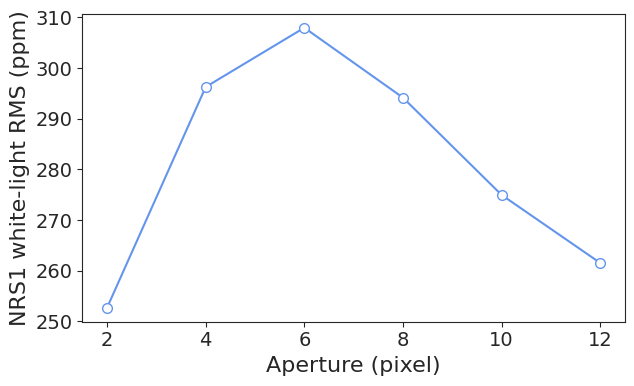

In [40]:
apertures = []
rms = []

# Define integrations that are out-of-transit:
idx = np.where((tsincestart_nrs1<2.5)|(tsincestart_nrs1>5))[0]

for a in [2,4,6,8,10,12]:

    wl = all_outputs_nrs1[a]['whitelight']
    x, y = tsincestart_nrs1[idx], wl[idx]

    coeff = np.polyfit(x,y,2)
    y = y - np.polyval(coeff, x)

    apertures.append(a)
    rms.append(np.sqrt(np.var(y)))

idx = np.argsort(np.array(apertures))

apertures = np.array(apertures)[idx]
rms = np.array(rms)[idx]

plt.figure(figsize=(7,4))

plt.plot(np.array(apertures), np.array(rms)*1e6, 'o-', color = 'cornflowerblue', mec = 'cornflowerblue', mfc = 'white', ms = 7)

#plt.xlim(np.min(tsincestart), np.max(tsincestart))
#plt.ylim(-2000,2000)
plt.xlabel('Aperture (pixel)', fontsize = 16)
plt.ylabel('NRS1 white-light RMS (ppm)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Repeat for NRS2:

(array([440., 460., 480., 500., 520., 540., 560., 580., 600.]),
 [Text(0, 440.0, '440'),
  Text(0, 460.0, '460'),
  Text(0, 480.0, '480'),
  Text(0, 500.0, '500'),
  Text(0, 520.0, '520'),
  Text(0, 540.0, '540'),
  Text(0, 560.0, '560'),
  Text(0, 580.0, '580'),
  Text(0, 600.0, '600')])

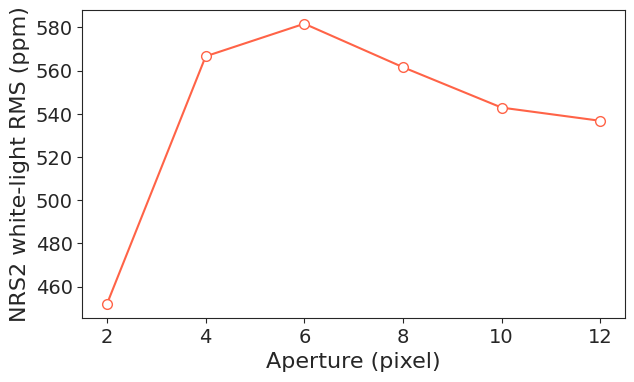

In [41]:
apertures = []
rms = []

# Define integrations that are out-of-transit:
idx = np.where((tsincestart_nrs2<2.5)|(tsincestart_nrs2>5))[0]

for a in [2,4,6,8,10,12]:

    wl = all_outputs_nrs2[a]['whitelight']
    x, y = tsincestart_nrs2[idx], wl[idx]

    coeff = np.polyfit(x,y,2)
    y = y - np.polyval(coeff, x)

    apertures.append(a)
    rms.append(np.sqrt(np.var(y)))

idx = np.argsort(np.array(apertures))

apertures = np.array(apertures)[idx]
rms = np.array(rms)[idx]

plt.figure(figsize=(7,4))

plt.plot(np.array(apertures), np.array(rms)*1e6, 'o-', color = 'tomato', mec = 'tomato', mfc = 'white', ms = 7)

#plt.xlim(np.min(tsincestart), np.max(tsincestart))
#plt.ylim(-2000,2000)
plt.xlabel('Aperture (pixel)', fontsize = 16)
plt.ylabel('NRS2 white-light RMS (ppm)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)